In [4]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM, SSMCMain.ModifiedMiCRM.SpaceMMiCRM

using Base.Threads
using JLD2
using DataFrames, FreqTables, AlgebraOfGraphics, NamedArrays, StatsBase

In [5]:
using GLMakie
using CairoMakie
# CairoMakie.activate!()
# GLMakie.activate!(; px_per_unit=1.)
# display(GLMakie.Screen(), f.figure)
ENV["COLUMNS"] = 280

280

### Multiple steady states?

In [8]:
mssdf = df[df.numss .!= 1,:];
nrow(mssdf)

0

### Multiple modes? Should not be unless a param is 0

In [9]:
mmdf = df[df.nummodes .!= 1,:];
@show nrow(mmdf)
unique(mmdf.DN)

nrow(mmdf) = 0


Float64[]

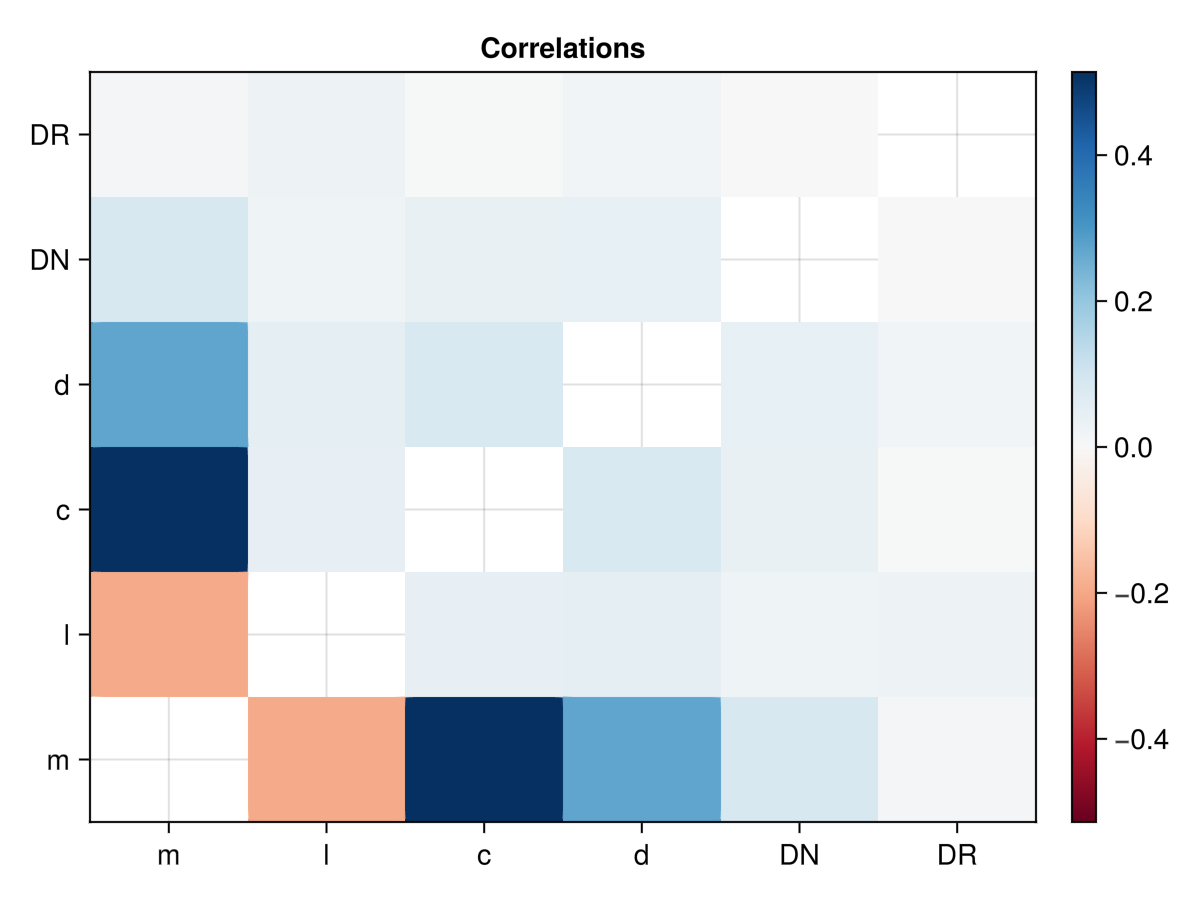

In [87]:
fap = plot_df_correlations(df, Not(:K,:DG,:numss,:nummodes))
# display(GLMakie.Screen(), fap.figure)
fap

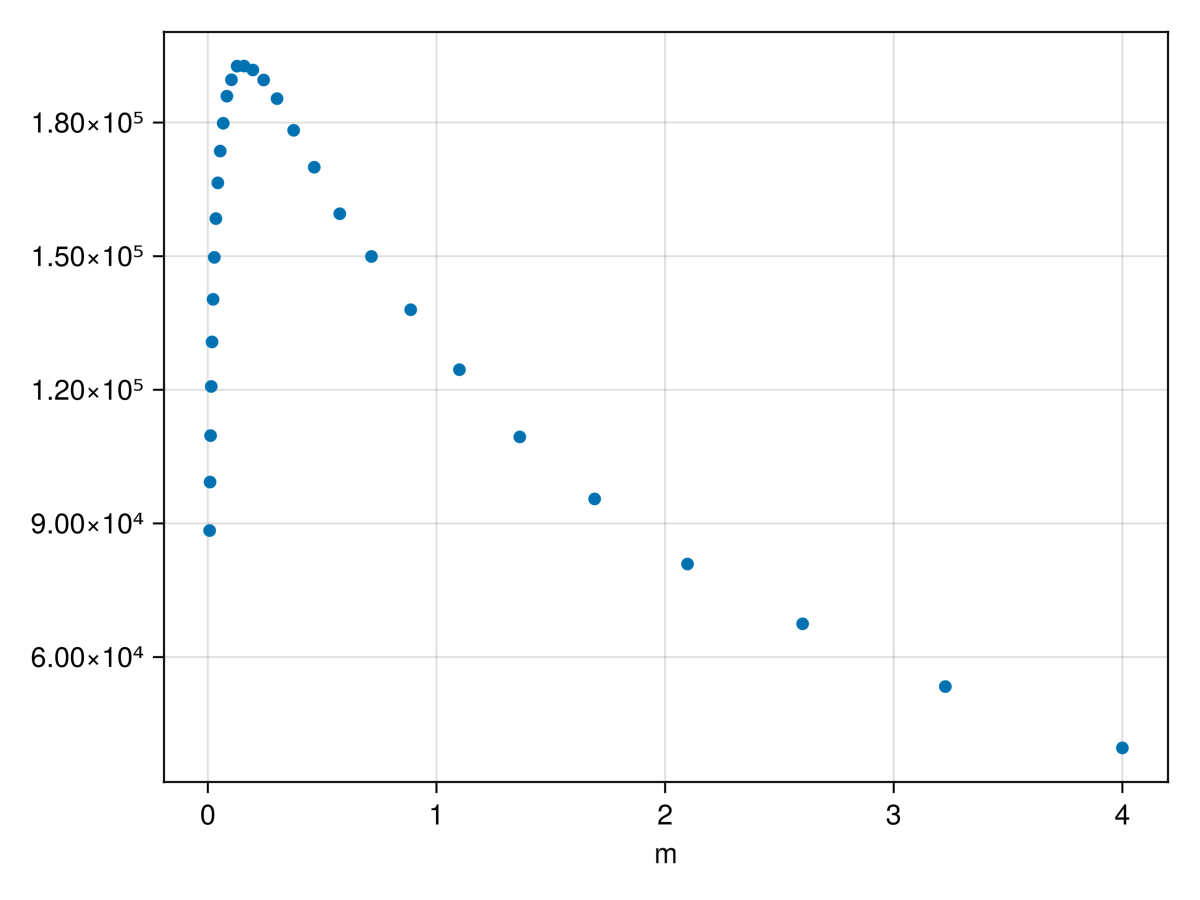

In [12]:
xx = freqtable(df, :m)
plot_namedvector_numeric(xx; logx=nothing)

# Single system nospace testing

10-element Vector{Float64}:
 0.7999999999972317
 0.7999999999972317
 0.7999999999972317
 0.7999999999972317
 0.7999999999972317
 0.20000000006969132
 0.20000000006969132
 0.20000000006969132
 0.20000000006969132
 0.20000000006969132

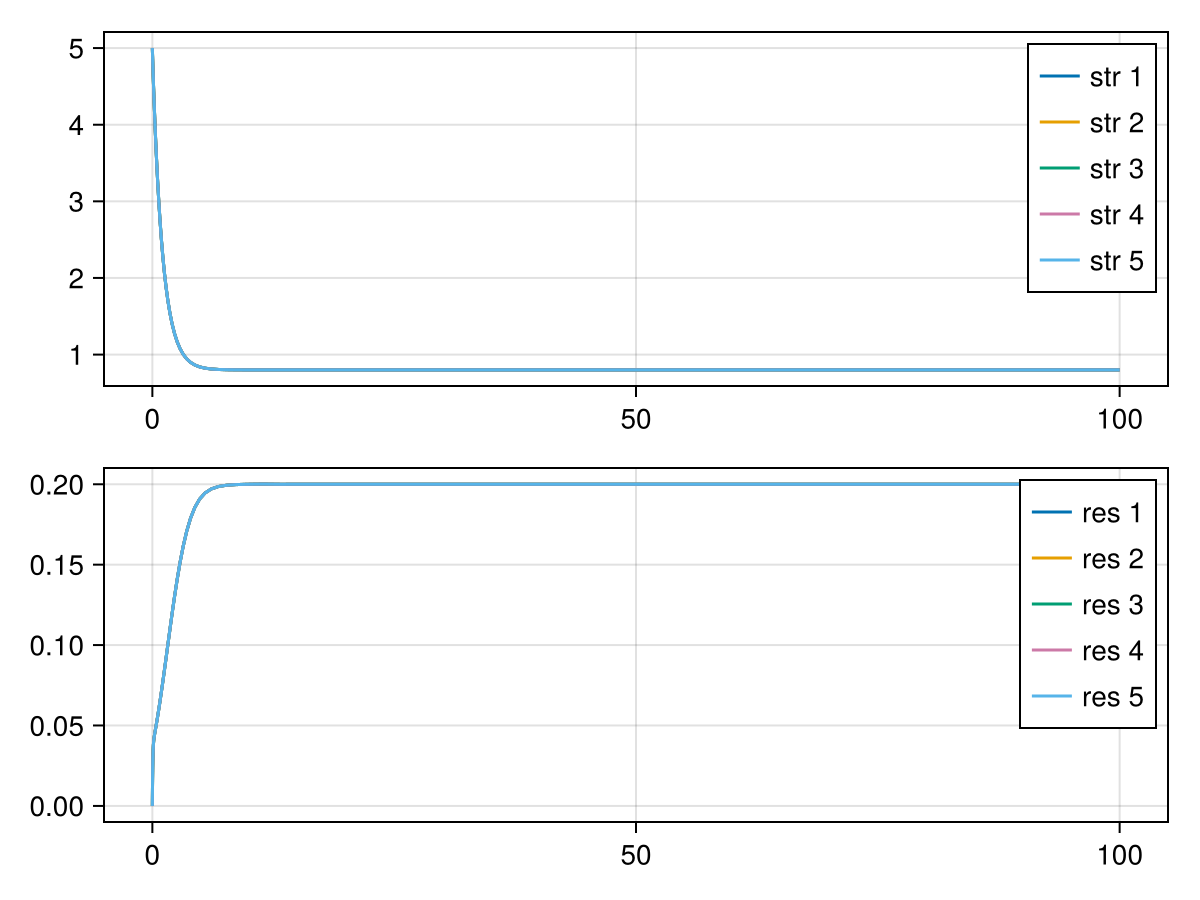

In [91]:
mmicrm_params = make_mmicrmparams_smart(5, 5)
u0 = make_mmicrmu0_smart(mmicrm_params; u0=:maxNs)
nsp = ODEProblem(mmicrmfunc!, u0, (0, 100), mmicrm_params)

check_mmicrmparams(nsp.p)
s = solve(nsp)
display(s.u[end])
plot_mmicrm_sol(s)